In [1]:
import SimpleITK as sitk
import numpy as np
from pymskt.image.meniscus_processing import subdivide_meniscus_regions
import matplotlib.pyplot as plt


In [2]:
path_seg = '/dataNAS/people/aagatti/projects/connie_ashley/dependencies/pymskt/data/SAG_3D_DESS_RIGHT_bones_cart_men_fib-label.nrrd'
seg_image = sitk.ReadImage(path_seg)

MED_MENISCUS_LABEL = 10
LAT_MENISCUS_LABEL = 9
MED_TIB_CART_LABEL = 2
LAT_TIB_CART_LABEL = 3
TIB_LABEL = 6
PAT_LABEL = 7
PAT_CART_LABEL = 4

In [3]:

# updated_seg_image = subdivide_meniscus_regions(
#     seg_image,
#     med_meniscus_label=MED_MENISCUS_LABEL, # Example label
#     lat_meniscus_label=LAT_MENISCUS_LABEL, # Example label
#     med_tib_cart_label=MED_TIB_CART_LABEL,
#     lat_tib_cart_label=LAT_TIB_CART_LABEL,
#     tib_label=TIB_LABEL, # Default tibial bone label
#     pat_label=PAT_LABEL, # Optional: Label for Patella bone
#     pat_cart_label=PAT_CART_LABEL, # Optional: Label for Patellar Cartilage
#     ml_axis=0,
#     ap_axis=2, # Assuming AP is axis 2 for angle calculation
#     is_axis=1, # Assuming IS is axis 1
#     min_cart_voxels=100, # Min voxels for tibial cartilage to be considered valid
#     cleanup_method='tibial_centroid', # Method passed to verify_and_correct_meniscus_sides
#     label_map = None, # Optional dict to override default subregion labels
#     verbose=True,
# )

updated_seg_image = subdivide_meniscus_regions(
    seg_image,
    med_meniscus_label=MED_MENISCUS_LABEL, # Example label
    lat_meniscus_label=LAT_MENISCUS_LABEL, # Example label
    med_tib_cart_label=MED_TIB_CART_LABEL,
    lat_tib_cart_label=LAT_TIB_CART_LABEL,
    tib_label=TIB_LABEL, # Default tibial bone label
    pat_label=PAT_LABEL, # Optional: Label for Patella bone
    pat_cart_label=PAT_CART_LABEL, # Optional: Label for Patellar Cartilage
    ml_axis=0,
    ap_axis=2, # Assuming AP is axis 2 for angle calculation
    is_axis=1, # Assuming IS is axis 1
    min_cart_voxels=100, # Min voxels for tibial cartilage to be considered valid
    cleanup_method='tibial_centroid', # Method passed to verify_and_correct_meniscus_sides
    center_method='tibia', # Center for polar coords: 'tibia' or 'cartilage'
    label_map = None, # Optional dict to override default subregion labels
    verbose=True,
)



Starting meniscus sub-region division...
Verifying and correcting meniscus sides using method: tibial_centroid...
Medial Tibial Cartilage Centroid (ML-axis): 63.07
Lateral Tibial Cartilage Centroid (ML-axis): 111.39
Using Tibial Bone Centroid Split Point: 90
Applying plane split at axis 0 = 90
Using spacing: ML=0.7000 (axis 0), AP=0.3646 (axis 2)
Defining polar coordinate system center using method: tibia...
Tibial Centroid (ML, AP): (90.18, 207.55)
Using global tibial centroid as polar center.
Using patella centroid to define Anterior direction.
Using patella bone label 7 for anchor.
Patellar Anchor Centroid (ML, AP): (97.79, 78.32)
Anterior Reference Angle (Patella direction = 0 degrees): -86.63 degrees relative to ML axis.
Classifying meniscus voxels into Anterior/Middle/Posterior regions...
Region classification complete using tibial center.
Assigning voxels to sub-regions...
Creating final output image...
Meniscus sub-region division complete.


[ 0  9 10]
[0 1 2 3 4 5 6]


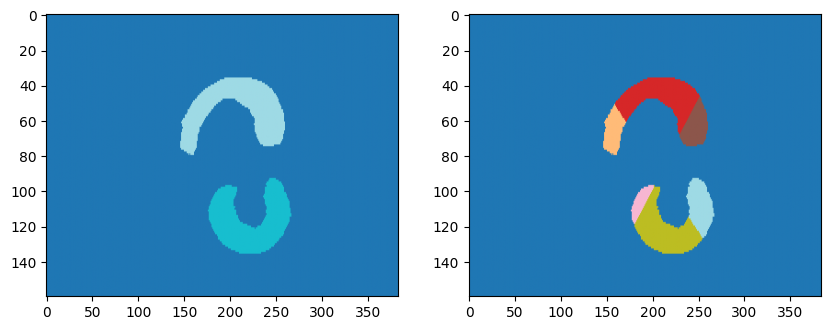

In [4]:
seg_array = sitk.GetArrayFromImage(seg_image)
updated_seg_array = sitk.GetArrayFromImage(updated_seg_image)

# get a volume of only the meniscus labels
meniscus_labels = [MED_MENISCUS_LABEL, LAT_MENISCUS_LABEL]
meniscus_volume = np.zeros_like(seg_array)
for label in meniscus_labels:
    meniscus_volume[seg_array == label] = label

meniscus_labels_updated = [101, 102, 103, 104, 105, 106]
meniscus_volume_updated = np.zeros_like(updated_seg_array)
for label in meniscus_labels_updated:
    meniscus_volume_updated[updated_seg_array == label] = label-100


# plot the flattned versions of the two meniscus volumes. Flatten along
# the inferior-superior axis

IS_AXIS = 1

flat_meniscus_volume = np.max(meniscus_volume, axis=IS_AXIS)
flat_meniscus_volume_updated = np.max(meniscus_volume_updated, axis=IS_AXIS)

print(np.unique(flat_meniscus_volume))
print(np.unique(flat_meniscus_volume_updated))

aspect_ratio = seg_image.GetSpacing()[2] / seg_image.GetSpacing()[1]

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(flat_meniscus_volume, cmap='tab20', aspect=aspect_ratio)
axs[1].imshow(flat_meniscus_volume_updated, cmap='tab20', aspect=aspect_ratio)






Starting meniscus sub-region division...
Verifying and correcting meniscus sides using method: tibial_centroid...
Medial Tibial Cartilage Centroid (ML-axis): 63.07
Lateral Tibial Cartilage Centroid (ML-axis): 111.39
Using Tibial Bone Centroid Split Point: 90
Applying plane split at axis 0 = 90
Using spacing: ML=0.7000 (axis 0), AP=0.3646 (axis 2)
Defining polar coordinate system center using method: cartilage...
Tibial Centroid (ML, AP): (90.18, 207.55)
Using individual tibial cartilage centroids as polar centers.
Medial Cartilage Center (ML, AP): (63.07, 208.67)
Lateral Cartilage Center (ML, AP): (111.39, 229.82)
Using patella centroid to define Anterior direction.
Using patella bone label 7 for anchor.
Patellar Anchor Centroid (ML, AP): (97.79, 78.32)
Anterior Reference Angle (Patella direction = 0 degrees): -86.63 degrees relative to ML axis.
Classifying meniscus voxels into Anterior/Middle/Posterior regions...
Region classification complete using cartilage centers.
Assigning voxels

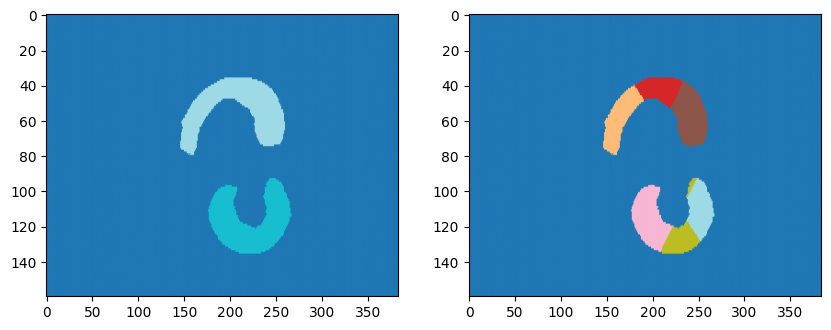

In [5]:


updated_seg_image = subdivide_meniscus_regions(
    seg_image,
    med_meniscus_label=MED_MENISCUS_LABEL, # Example label
    lat_meniscus_label=LAT_MENISCUS_LABEL, # Example label
    med_tib_cart_label=MED_TIB_CART_LABEL,
    lat_tib_cart_label=LAT_TIB_CART_LABEL,
    tib_label=TIB_LABEL, # Default tibial bone label
    pat_label=PAT_LABEL, # Optional: Label for Patella bone
    pat_cart_label=PAT_CART_LABEL, # Optional: Label for Patellar Cartilage
    ml_axis=0,
    ap_axis=2, # Assuming AP is axis 2 for angle calculation
    is_axis=1, # Assuming IS is axis 1
    min_cart_voxels=100, # Min voxels for tibial cartilage to be considered valid
    cleanup_method='tibial_centroid', # Method passed to verify_and_correct_meniscus_sides
    center_method='cartilage', # Center for polar coords: 'tibia' or 'cartilage'
    label_map = None, # Optional dict to override default subregion labels
    verbose=True,
)


seg_array = sitk.GetArrayFromImage(seg_image)
updated_seg_array = sitk.GetArrayFromImage(updated_seg_image)

# get a volume of only the meniscus labels
meniscus_labels = [MED_MENISCUS_LABEL, LAT_MENISCUS_LABEL]
meniscus_volume = np.zeros_like(seg_array)
for label in meniscus_labels:
    meniscus_volume[seg_array == label] = label

meniscus_labels_updated = [101, 102, 103, 104, 105, 106]
meniscus_volume_updated = np.zeros_like(updated_seg_array)
for label in meniscus_labels_updated:
    meniscus_volume_updated[updated_seg_array == label] = label-100


# plot the flattned versions of the two meniscus volumes. Flatten along
# the inferior-superior axis

IS_AXIS = 1

flat_meniscus_volume = np.max(meniscus_volume, axis=IS_AXIS)
flat_meniscus_volume_updated = np.max(meniscus_volume_updated, axis=IS_AXIS)

print(np.unique(flat_meniscus_volume))
print(np.unique(flat_meniscus_volume_updated))

aspect_ratio = seg_image.GetSpacing()[2] / seg_image.GetSpacing()[1]

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(flat_meniscus_volume, cmap='tab20', aspect=aspect_ratio)
axs[1].imshow(flat_meniscus_volume_updated, cmap='tab20', aspect=aspect_ratio)







Starting meniscus sub-region division...
Verifying and correcting meniscus sides using method: tibial_centroid...
Medial Tibial Cartilage Centroid (ML-axis): 63.07
Lateral Tibial Cartilage Centroid (ML-axis): 111.39
Using Tibial Bone Centroid Split Point: 90
Applying plane split at axis 0 = 90
Using spacing: ML=0.7000 (axis 0), AP=0.3646 (axis 2)
Defining polar coordinate system center using method: cartilage...
Tibial Centroid (ML, AP): (90.18, 207.55)
Using individual tibial cartilage centroids as polar centers.
Medial Cartilage Center (ML, AP): (63.07, 208.67)
Lateral Cartilage Center (ML, AP): (111.39, 229.82)
Adjusting cartilage centers inward by fraction: 0.25
Adjusted Medial Center (ML, AP): (75.15, 213.96)
Adjusted Lateral Center (ML, AP): (99.31, 224.53)
Using patella centroid to define Anterior direction.
Using patella bone label 7 for anchor.
Patellar Anchor Centroid (ML, AP): (97.79, 78.32)
Anterior Reference Angle (Patella direction = 0 degrees): -86.63 degrees relative to

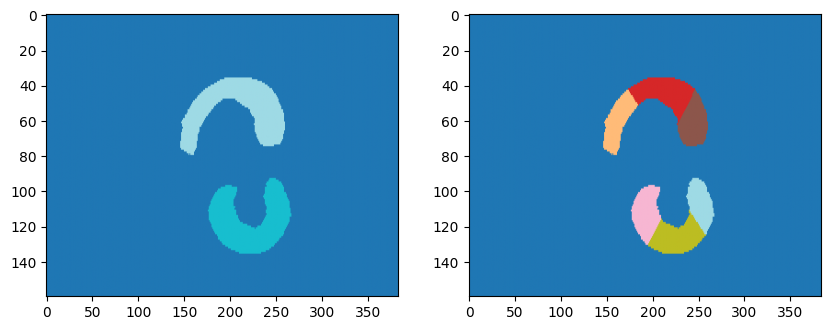

In [6]:


updated_seg_image = subdivide_meniscus_regions(
    seg_image,
    med_meniscus_label=MED_MENISCUS_LABEL, # Example label
    lat_meniscus_label=LAT_MENISCUS_LABEL, # Example label
    med_tib_cart_label=MED_TIB_CART_LABEL,
    lat_tib_cart_label=LAT_TIB_CART_LABEL,
    tib_label=TIB_LABEL, # Default tibial bone label
    pat_label=PAT_LABEL, # Optional: Label for Patella bone
    pat_cart_label=PAT_CART_LABEL, # Optional: Label for Patellar Cartilage
    ml_axis=0,
    ap_axis=2, # Assuming AP is axis 2 for angle calculation
    is_axis=1, # Assuming IS is axis 1
    min_cart_voxels=100, # Min voxels for tibial cartilage to be considered valid
    cleanup_method='tibial_centroid', # Method passed to verify_and_correct_meniscus_sides
    center_method='cartilage', # Center for polar coords: 'tibia' or 'cartilage'
    label_map = None, # Optional dict to override default subregion labels
    verbose=True,
    cartilage_center_offset_fraction = 0.25
)


seg_array = sitk.GetArrayFromImage(seg_image)
updated_seg_array = sitk.GetArrayFromImage(updated_seg_image)

# get a volume of only the meniscus labels
meniscus_labels = [MED_MENISCUS_LABEL, LAT_MENISCUS_LABEL]
meniscus_volume = np.zeros_like(seg_array)
for label in meniscus_labels:
    meniscus_volume[seg_array == label] = label

meniscus_labels_updated = [101, 102, 103, 104, 105, 106]
meniscus_volume_updated = np.zeros_like(updated_seg_array)
for label in meniscus_labels_updated:
    meniscus_volume_updated[updated_seg_array == label] = label-100


# plot the flattned versions of the two meniscus volumes. Flatten along
# the inferior-superior axis

IS_AXIS = 1

flat_meniscus_volume = np.max(meniscus_volume, axis=IS_AXIS)
flat_meniscus_volume_updated = np.max(meniscus_volume_updated, axis=IS_AXIS)

print(np.unique(flat_meniscus_volume))
print(np.unique(flat_meniscus_volume_updated))

aspect_ratio = seg_image.GetSpacing()[2] / seg_image.GetSpacing()[1]

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(flat_meniscus_volume, cmap='tab20', aspect=aspect_ratio)
axs[1].imshow(flat_meniscus_volume_updated, cmap='tab20', aspect=aspect_ratio)







